# Unit 5 - Financial Planning

In [92]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
response_btc = requests.get(btc_url)
btc_data = response_btc.json()
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]


# Fetch current ETH price

response_eth = requests.get(eth_url)
eth_data = response_eth.json()
eth_price =eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
total_crypto = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $33840.00
The current value of your 5.3 ETH is $10280.15


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")
alpaca

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2023-04-18", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
portfolio_df = alpaca.get_bars(tickers, timeframe, start=today, end=today).df

# Reorganize the DataFrame
# Separate ticker data

AGG = portfolio_df[portfolio_df["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = portfolio_df[portfolio_df["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
concat_port_df = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
concat_port_df

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2023-04-18 04:00:00+00:00  98.91  99.16  98.91  99.04  4753036       17652   

                                         SPY                            \
                                vwap    open    high       low   close   
timestamp                                                                
2023-04-18 04:00:00+00:00  99.022777  415.58  415.72  412.7802  414.21   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-04-18 04:00:00+00:00  63558297      493076  414.073774

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(concat_port_df["AGG"]["close"])
spy_close_price = float(concat_port_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current SPY closing price: ${spy_close_price}")
print(f"Current AGG closing price: ${agg_close_price}")

Current SPY closing price: $414.21
Current AGG closing price: $99.04


In [11]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
total_etfs = my_spy_value + my_agg_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20710.50
The current value of your 200 AGG shares is $19808.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
amount = {"amount":[total_crypto, total_etfs]}
types = ["crypto", "shares"]

# Create savings DataFrame

df_savings = pd.DataFrame(amount, index=types)

# Display savings DataFrame
display(df_savings)

,amount
crypto,44120.145
shares,40518.500


<AxesSubplot:ylabel='amount'>

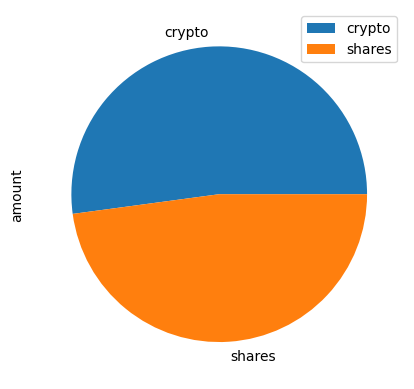

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="amount")

In [45]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
current_savings = float(df_savings.sum())

# Validate saving health
health = current_savings - emergency_fund

if health > 0:
    print(f"Congratulations on surpassing your goal!")
elif health == 0:
    print(f"Congratulations on meeting your goal!")
else:
    print(f"You are ${round(health*-1, 2)} away from meeting your goal.")


Congratulations on surpassing your goal!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [106]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [109]:
# Get 5 years' worth of historical data for SPY and AGG

tickers=["SPY", "AGG"]

df_port = alpaca.get_bars(tickers, timeframe, start= start_date, end= end_date, limit=100000).df

# Reorganize the DataFrame
# Separate ticker data
SPY_port = df_port[df_port["symbol"]=="SPY"].drop("symbol", axis=1)
AGG_port = df_port[df_port["symbol"]=="AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames

portfolio_df_concat = pd.concat([SPY_port, AGG_port], axis=1, keys=["SPY", "AGG"])

# Display sample data
portfolio_df_concat

SPY                                         \
                             open    high       low     close     volume   
timestamp                                                                  
2016-05-02 04:00:00+00:00  206.92  208.18  206.4100  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.2800  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.4200  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.4700  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.8800  205.7200   89131004   
...                           ...     ...       ...       ...        ...   
2021-04-26 04:00:00+00:00  417.44  418.22  416.8111  417.6100   51824860   
2021-04-27 04:00:00+00:00  417.93  418.14  416.3000  417.5200   50297139   
2021-04-28 04:00:00+00:00  417.81  419.01  416.9000  417.4000   50692781   
2021-04-29 04:00:00+00:00  420.32  420.72  416.4400  420.0600   76965583   
2021-04-30 04:00:00+00:00  417.63  418.54  416.3400  417.3000   84731942   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   
...                               ...         ...     ...       ...       ...   
2021-04-26 04:00:00+00:00      295870  417.508245  114.74  114.8015  114.6500   
2021-04-27 04:00:00+00:00      296300  417.481360  115.13  115.1300  114.3700   
2021-04-28 04:00:00+00:00      330049  417.742098  114.45  114.4685  114.2000   
2021-04-29 04:00:00+00:00      443396  418.824046  114.14  114.3700  114.0900   
2021-04-30 04:00:00+00:00      478844  417.651995  114.41  114.5150  114.3300   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2016-05-02 04:00:00+00:00  110.605  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.810  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.860  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.140  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.970  2718710       12697  111.031967  
...                            ...      ...         ...         ...  
2021-04-26 04:00:00+00:00  114.650  3480303       13520  114.706244  
2021-04-27 04:00:00+00:00  114.370  3820640       12720  114.498315  
2021-04-28 04:00:00+00:00  114.430  7075831       24303  114.379810  
2021-04-29 04:00:00+00:00  114.370  6208142       21096  114.250702  
2021-04-30 04:00:00+00:00  114.490  6469432       19582  114.456246  

[1259 rows x 14 columns]

In [113]:
# Simulating Returns
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_30YR = MCSimulation(
        portfolio_data=portfolio_df_concat,
        weights= [0.6, 0.4],
        num_simulation=500,
        num_trading_days= 252*30
    )

MC_30YR.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\mdcod\OneDrive\Desktop\API_Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007235,1.009435,1.002227,0.982399,0.998080,0.992992,1.007140,0.996161,0.986873,1.001208,...,1.004285,0.998242,1.007903,0.999010,0.993894,0.999550,1.004551,0.993687,1.004853,0.997195
2,1.013684,0.992235,1.013842,0.997801,1.008295,0.996106,1.005440,1.002870,0.993027,1.013917,...,1.012922,1.005225,0.998067,1.007317,0.987388,0.996765,0.997118,1.000968,1.010916,0.986417
3,1.010595,0.994811,1.015483,0.995271,1.010641,0.990732,1.019200,1.004947,0.990056,1.006140,...,1.012964,0.998004,0.998768,1.011464,0.992024,0.994997,0.989909,0.999962,1.020851,0.984343
4,1.004424,1.001667,1.011942,0.989838,1.013590,1.001383,1.021162,1.015279,0.983254,1.002146,...,1.005685,0.998527,0.996919,1.004188,0.983101,0.990378,0.982793,0.992485,1.035387,0.987929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.737743,15.396489,31.123133,7.224155,9.078837,4.765717,24.406007,10.495655,5.956080,22.975557,...,6.912712,38.901388,12.344916,5.152518,21.258217,43.774445,14.738229,5.803665,34.128618,6.988964
7557,9.578165,15.409504,31.466500,7.242553,9.039554,4.798764,24.207995,10.493237,5.971335,23.031095,...,6.905030,39.040989,12.285737,5.141723,21.383283,43.388759,14.753357,5.765670,34.067802,7.049815
7558,9.631327,15.295353,31.771321,7.161076,8.989896,4.821027,24.256485,10.353369,6.037074,23.201553,...,6.905725,39.034330,12.380584,5.110113,21.289807,44.064243,14.809255,5.743547,33.767697,7.044502
7559,9.658117,15.303968,32.113106,7.117385,9.009186,4.824950,24.556325,10.346870,6.109547,23.223961,...,6.947809,39.051235,12.556516,5.109920,21.287381,44.382312,14.914662,5.790651,33.947021,7.029563


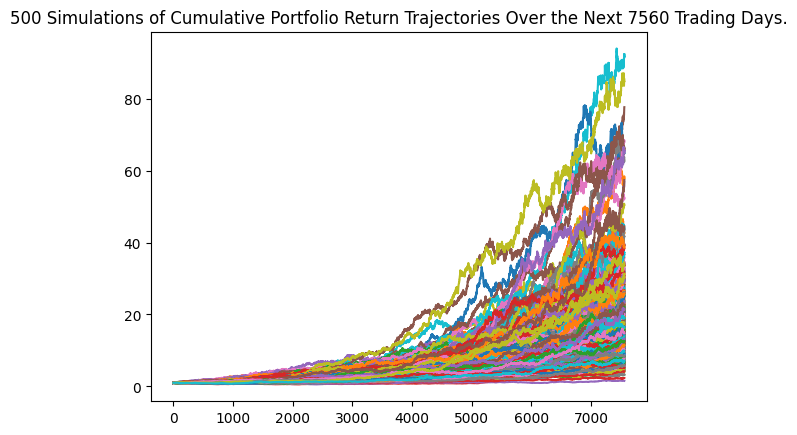

In [114]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

line_plot = MC_30YR.plot_simulation()

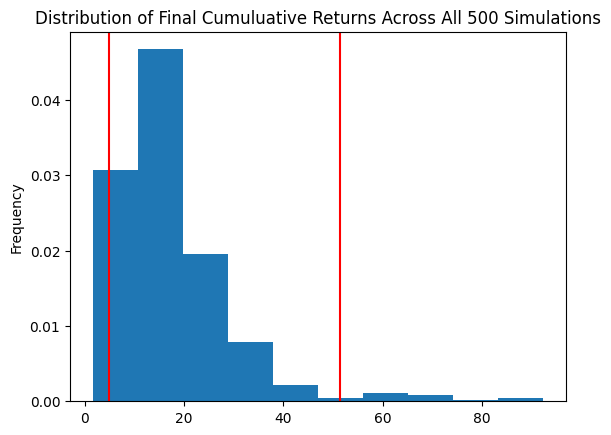

In [115]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30YR.plot_distribution()

### Retirement Analysis

In [119]:
# Fetch summary statistics from the Monte Carlo simulation results


# Print summary statistics
tbl = MC_30YR.summarize_cumulative_return()
print(tbl)


count           500.000000
mean             17.562928
std              11.659985
min               1.565803
25%              10.172171
50%              14.998378
75%              21.324094
max              92.336448
95% CI Lower      4.955420
95% CI Upper     51.411697
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [121]:
# Set initial investment
initial_investment = 20000
ci_lower = tbl[8]
ci_upper = tbl[9]

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
lower_bound = initial_investment * ci_lower
upper_bound = initial_investment * ci_upper

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${round(lower_bound,2)} and ${round(upper_bound,2)}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $99108.4 and $1028233.93


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [122]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

lower_bound_2 = initial_investment * ci_lower
upper_bound_2 = initial_investment * ci_upper

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${round(lower_bound_2,2)} and ${round(upper_bound_2,2)}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $148662.6 and $1542350.9


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")